## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 12: Data Fusion & Data Integration 
#### Exercises

## Taner Bulbul  
## INST 447

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1
In your own words, what is the difference between Data Fusion and Data Integration? Give examples other than the ones in this chapter. 


Data integration is combining the data obects from different sources which have a connection and data obects have the same definition or with some restructuring the data obects can have the same definition and can be connected so that combining them is easier. An example of a data integration, we can have data of graduating students from several colleges and combine the data to make analysis of graduation rates overall or per major connecting the data on same data obects such as majors and studetnts.  

Data fusion is used when the data sourecs don't have the same definition of data obects and we can't make the same data definition for the obects in different datasets with restructuring. In data fusuion we have to make some assumptions and abstractions and restructure the data based on those assumptions so the data objects have the same definition for analysis. An example of data fusion could be that a self driving car collects data from many sensors and makes some assumptions and drives/defines new data objects from these for example for a collision calculation. There is no clear connection between the data collected from diffrent sensors.

# Exercise 2
Answer the following question about **Challenge 4: Aggregation mismatch**. Is this challenge a data fusion one, a data integration, or both? Explain.

This challenge is a data integration. The data obects initially don't have the same definition and connection but after some restructuring and reformatting the data can be joined and analyzed. With aggregation mismatch we can restructure the data on common data objects and combine the datasets with simple data restructuring and data transformation.

# Exercise 3
How come **Challenge 2: Unwise data collection** is somehow both a data cleaning step and a data integration? Do you think it is essential that we categorize if an unwise data collection should be under data cleaning or data integration? 

It isn't essential to categorize as data cleaning or data integration. We will usually need data cleaning step regradless of the need for data integration. Actuallym without data celaning we usually can't proceeed to data integration. Extracting the date and place and creating codable and intuitive columns were part of data cleaning but combining the data from multpile speech datasets is part of data integration. 

# Exercise 4
In Example 1 of this chapter, we used multi-level indexing using Date and Hour to overcome the index mismatched formatting challenge. For this exercise, repeat this example but this time use a single level indexing using python DataTime object.

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [278]:
electric_df = pd.read_csv('Electricity Data 2016_2017.csv')
temp_df = pd.read_csv('Temperature 2016.csv')

In [279]:
#drop 2017 data since we don't have temperarure data for 2016
BM = electric_df.Date.str.contains('2017') 
dropping_index = electric_df[BM].index
electric_df.drop(index = dropping_index,inplace=True)
electric_df.reset_index(drop=True,inplace=True)
electric_df.head()

,Date,Time,Consumption
0,12/31/2016,0:00,74259.0
1,12/31/2016,0:15,NaN
2,12/31/2016,0:30,72715.0
3,12/31/2016,0:45,NaN
4,12/31/2016,1:00,70283.0


In [280]:
#format date and time as pandas datetime object
dt_list=[]
for d,t in zip(electric_df.Date,electric_df.Time):
    date = datetime.strptime(d,"%m/%d/%Y")
    time = datetime.strptime(t,"%H:%M")
    #setting minute to zero intentionally here so we can group by he hour below
    date = datetime(year=date.year, month=date.month, day=date.day,hour=time.hour, minute=0)
    dt_list.append(date)

#add a new column and drop the old ones
electric_df['date_time']=dt_list
electric_df = electric_df.set_index(['date_time']).drop(columns=['Date','Time'])
electric_df.head()

,Consumption
date_time,
2016-12-31 00:00:00,74259.0
2016-12-31 00:00:00,NaN
2016-12-31 00:00:00,72715.0
2016-12-31 00:00:00,NaN
2016-12-31 01:00:00,70283.0


In [281]:
#check what the temperature datset looks like
temp_df.head()

,Timestamp,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0


In [282]:
#format temp_df Timestamp with datetime object, add new date_time column and drop old ones
temp_df['date_time'] = [datetime.strptime(d,"%Y-%m-%dT%H:%M:%S") for d in temp_df.Timestamp]
temp_df = temp_df.set_index(['date_time']).drop(columns=['Timestamp'])
temp_df.head()

,temp
date_time,
2016-01-01 00:00:00,79.0
2016-01-01 01:00:00,79.0
2016-01-01 02:00:00,77.5
2016-01-01 03:00:00,79.0
2016-01-01 04:00:00,77.0


In [283]:
#group the consumption data by date and sum the 
integrate_sr = electric_df.groupby(['date_time']).Consumption.sum()
integrate_sr

date_time
2016-01-01 00:00:00    119052.0
2016-01-01 01:00:00    113138.0
2016-01-01 02:00:00    111013.0
2016-01-01 03:00:00    104808.0
2016-01-01 04:00:00     99552.0
                         ...   
2016-12-31 19:00:00    154958.0
2016-12-31 20:00:00    149484.0
2016-12-31 21:00:00    143693.0
2016-12-31 22:00:00    142717.0
2016-12-31 23:00:00    150928.0
Name: Consumption, Length: 8784, dtype: float64

In [284]:
#Integrate by joning the two dataframes (temperature and consumption data)
integrate_df =temp_df.join(integrate_sr)
integrate_df.head()

,temp,Consumption
date_time,,
2016-01-01 00:00:00,79.0,119052.0
2016-01-01 01:00:00,79.0,113138.0
2016-01-01 02:00:00,77.5,111013.0
2016-01-01 03:00:00,79.0,104808.0
2016-01-01 04:00:00,77.0,99552.0


In [285]:
integrate_df.reset_index(inplace=True)
integrate_df.head()

,date_time,temp,Consumption
0,2016-01-01 00:00:00,79.0,119052.0
1,2016-01-01 01:00:00,79.0,113138.0
2,2016-01-01 02:00:00,77.5,111013.0
3,2016-01-01 03:00:00,79.0,104808.0
4,2016-01-01 04:00:00,77.0,99552.0


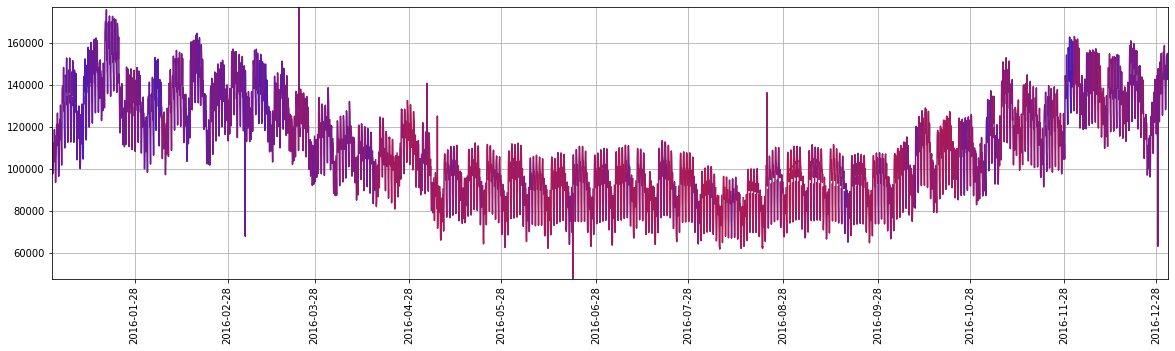

In [286]:
#Rewrite the code using python datetime object
days = integrate_df.date_time.map(lambda t: t.date()).unique() #get only unique dates

max_temp, min_temp = integrate_df.temp.max(), integrate_df.temp.min()
green =0.1

plt.figure(figsize=(20,5))

for d in days:
    BM = integrate_df.date_time.dt.date == d  #filter unique dates (days)
    wdf = integrate_df[BM]
    
    average_temp = wdf.temp.mean()
    red = (average_temp - min_temp)/ (max_temp - min_temp)
    blue = 1-red
    clr = [red,green,blue]
    plt.plot(wdf.index,wdf.Consumption,c = clr)
BM = (integrate_df.date_time.dt.hour == 0) & (integrate_df.date_time.dt.day == 28)
plt.xticks(integrate_df[BM].index,integrate_df[BM].date_time.dt.date,rotation=90)
plt.grid()
plt.margins(y=0,x=0)
plt.show()

# Exercise 5
Recreate **Figure 5.23** from **Chapter 5 Data Visualization**, but this time instead of using *WH Report_preprocessed.csv*, integrate the following three files yourself first: *WH Report.csv*, *populations.csv*, and *Countires.csv*. Hint: information about happiness indices come from *WH Report.csv*, information of the countries content comes from *Countires.csv*, and population information comes from *populations.csv*. 

Let's check the three datasets and have some understanding about their data structure, formatting first.

In [287]:
wh_df = pd.read_csv('./WH Report.csv')
wh_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [288]:
populations_df = pd.read_csv('./populations.csv')
populations_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [289]:
country_df = pd.read_csv('./Countires.csv')
country_df.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


WH Report tabel has most of the information but missing Continent and Population columns for our 5 dimensional analysis. We also need to do some Levl I ckleaning on the WH report file.

In [290]:
wh_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [291]:
#do some level 1 cleanup, making codable column names
wh_df.rename(columns = {'Country name':'Name','Life Ladder':'Life_Ladder', 'Log GDP per capita':'Log_GDP_per_capita',
                        'Social support':'Social_support','Healthy life expectancy at birth':'Healthy_life_expectancy_at_birth',
                        'Freedom to make life choices':'Freedom_to_make_life_choices',
                        'Perceptions of corruption':'Perceptions_of_corruption', 'Positive affect':'Positive_affect',
                        'Negative affect':'Negative_affect'}, inplace = True)
wh_df.head()

,Name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


We can add two columns to WH report and after cleaning, reformatting and restructuring tye WH report, we can generate th Figure 5.23 graph using this transformed dataset. 

In [292]:
wh_df['population']= np.nan
wh_df['Continent']= np.nan

Continent names for each country can be found from the country_df data but the country names are not in a standard format. We search the country names in the country_df and extract the Continent for each country.

In [293]:
for j,country in enumerate(country_df.Country_Name):
    for i, name in enumerate(wh_df.Name):
        if name.lower() in country.lower():
            wh_df.loc[i,'Continent']= country_df.Continent_Name[j]
wh_df.head()

,Name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,population,Continent
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,NaN,Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,NaN,Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,NaN,Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,NaN,Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,NaN,Asia


Let's select only 2010 to 2019 time period and reset the index.

In [294]:
BM = (wh_df.year >= 2010) & (wh_df.year <= 2019)
wh_df = wh_df[BM]
wh_df.reset_index(drop=True,inplace=True)
wh_df.head()

,Name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,population,Continent
0,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,NaN,Asia
1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,NaN,Asia
2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,NaN,Asia
3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,NaN,Asia
4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,NaN,Asia


We extract the population for each country and the year from thr population dataset. Once the country name is matched, the poulation for the year in WH report is found in the population table matching country name row and the year in the column.

In [295]:
for i, name in enumerate(wh_df.Name):
    for j, country in enumerate(populations_df['Country Name']):
        if name.lower() in country.lower():
            wh_df.loc[i,'population'] = populations_df.loc[j,str(wh_df.loc[i,'year'])]
            
wh_df.head()

,Name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,population,Continent
0,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,29185507.0,Asia
1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,30117413.0,Asia
2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,31161376.0,Asia
3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,32269589.0,Asia
4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,33370794.0,Asia


In [296]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              1412 non-null   object 
 1   year                              1412 non-null   int64  
 2   Life_Ladder                       1412 non-null   float64
 3   Log_GDP_per_capita                1385 non-null   float64
 4   Social_support                    1402 non-null   float64
 5   Healthy_life_expectancy_at_birth  1367 non-null   float64
 6   Freedom_to_make_life_choices      1392 non-null   float64
 7   Generosity                        1366 non-null   float64
 8   Perceptions_of_corruption         1326 non-null   float64
 9   Positive_affect                   1396 non-null   float64
 10  Negative_affect                   1400 non-null   float64
 11  population                        1314 non-null   float64
 12  Contin

We see above we have some missing data in the population and continent and in other columns. Let's print the missing population and Continent rows and see if we can handle filling them or ignore them. It could be that data is totally missing in the datasets or our reconstructing and selecting country names have some mistaches. If we have the population and not the continent name we can fill the continent names easily.

In [297]:
for i,name in enumerate(wh_df.Name):
    if ~np.isnan(wh_df.population[i]) and (str(wh_df.Continent[i]) == 'nan'):
        print('{}\t\t\t{}\t\t{}'.format(name,wh_df.population[i],wh_df.Continent[i]))
    

Kosovo			1775680.0		nan
Kosovo			1791000.0		nan
Kosovo			1807106.0		nan
Kosovo			1818117.0		nan
Kosovo			1812771.0		nan
Kosovo			1788196.0		nan
Kosovo			1777557.0		nan
Kosovo			1791003.0		nan
Kosovo			1797085.0		nan
Kosovo			1794248.0		nan
North Macedonia			2070741.0		nan
North Macedonia			2072487.0		nan
North Macedonia			2074278.0		nan
North Macedonia			2076067.0		nan
North Macedonia			2077775.0		nan
North Macedonia			2079328.0		nan
North Macedonia			2080745.0		nan
North Macedonia			2081996.0		nan
North Macedonia			2082958.0		nan
North Macedonia			2083459.0		nan


Looks like both these countries are in Europe so we can set the Continent and make use of their populations in our analysis.

In [299]:
for i,name in enumerate(wh_df.Name):
    if ~np.isnan(wh_df.population[i]) and (str(wh_df.Continent[i]) == 'nan'):
        wh_df.loc[i,'Continent']= 'Europe'

In [300]:
#Drop rows with NaN cells in the columns we want to do the analysis
wh_df = wh_df.dropna(subset=['population','Continent','Healthy_life_expectancy_at_birth','Log_GDP_per_capita','year'])
wh_df.reset_index(drop=True,inplace=True)

The graph function is the same from chapter 5 whre the new dataset integrated from the three datasets is used. There are some minor differences comparing to chapter 5. For example Georgia shows as in Antarctica in chapter 5 dataset but when I processed it it shows as in Europe. There are also several countries names totally different between these three datasets and unless I individually and manually manipulate there is no easy way to integrate their data so I skipped those small ones.

In [301]:
from ipywidgets import interact, widgets
Continent_poss = wh_df.Continent.unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r', 'South America':'c',
            'Oceania':'m', 'North America':'y', 'Antarctica':'k'}
wh_df = wh_df.sort_values(['population'], ascending=False)

def plotyear(year):
    for cotinent in Continent_poss:
        BM1 = (wh_df.year == year)
        BM2 = (wh_df.Continent ==cotinent)
        BM = BM1 & BM2
        size = wh_df[BM].population/200000
        X = wh_df[BM].Healthy_life_expectancy_at_birth
        Y= wh_df[BM].Log_GDP_per_capita
        plt.scatter(X,Y,c=colors_dic[cotinent], marker='o', s=size,
                    linewidths=0.5,edgecolors='w',label=cotinent)
        
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(markerscale=0.5)
    plt.show()

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>